# <span style="color:darkblue"> Project 2 Report </span>

<font size = "5">
This project will contain a series of analysis on the data of Chinese loans to African countrie and produce a short report.

It will focus on the following issue: we care whether Chinese loans are increasingly resource-oriented, or as suggested by its strategic ambitions, guided by connecting countries and thus emphasizing better infrasutructure demanded by the developing countries? This will help reveal the logic of Chinese loans in Africa, at least partially. It will collect evidence from the following perspectives. 

- How does the total amount of investment(loans) change based on the loan categories by year? 

- Do countries with more natural resource reserves tend to receive larger projects (financially speaking)?
- Do countries with more natural resource reserves tend to have greater loan inflows? 



<font size = "4" color="red" >
The findings for the report are: 

- Chinese loans on transportation increase steadily before the global pandemic, while loans on energy seems to change erratically;
- Loans to resource-rich countries do not have greater amount;
- resource-rich countries do not seem to receive more money from the loans they are granted.

Overall, the reports do not support a "natural resource depletion" view of Chinese development loans, while moderately support that China uses the loans to export its infrastruture building capacity.  </font>


In [6]:
# import packages 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import ticker
import matplotlib.dates as mdates

import statsmodels.api as sm
import statsmodels.formula.api as smf





In [12]:
#load data from project 1 

project = pd.read_csv("project_1.csv")

#useless variable
project = project.drop(columns=['Unnamed: 0'])


<font size = "4">

Before conducting data analysis, we can view the summary statistics of the data. 



In [13]:
summary = pd.DataFrame({
    'Data Type': project.dtypes,
    'Number of Observations': project.count(),
    'Number of Missing Values': project.isnull().sum(),
    'Unique Values': project.nunique()
})

print(summary)

                    Data Type  Number of Observations  \
Country Project No.     int64                     543   
Project Name           object                     543   
Year                    int64                     543   
Lender                 object                     543   
Allocation (USD)       object                     543   
Country                object                     543   
Loan_Type              object                     543   
Amount_Numeric        float64                     543   

                     Number of Missing Values  Unique Values  
Country Project No.                         0             70  
Project Name                                0            537  
Year                                        0             24  
Lender                                      0             30  
Allocation (USD)                            0            439  
Country                                     0             46  
Loan_Type                                   0

<font size = "4">

First, we plot the year trend of total loan amount by types. 

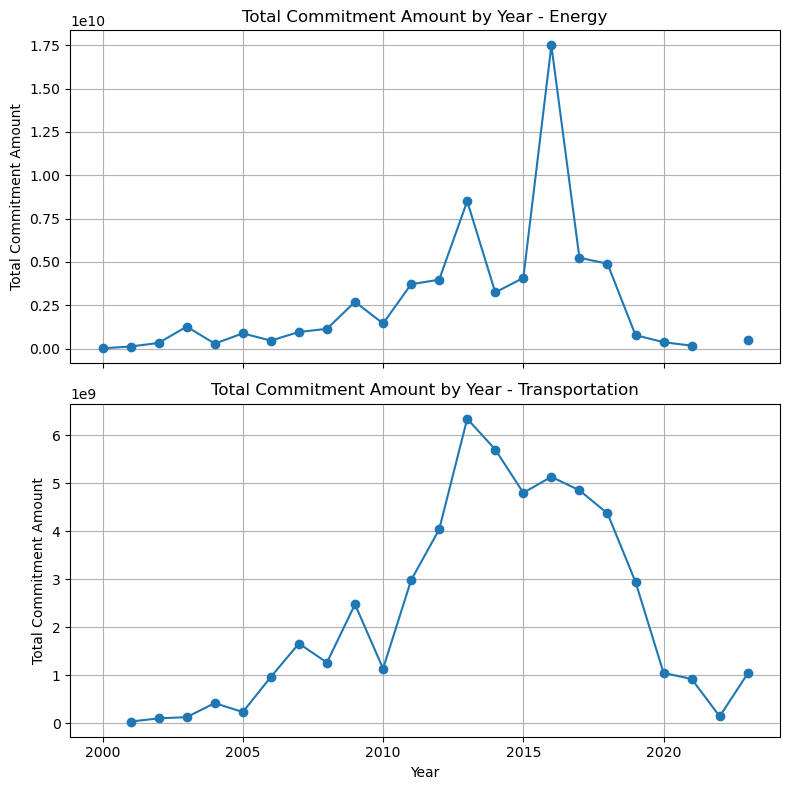

In [8]:
# Grouping data by 'Year' and 'Type' and summing the 'Commitment Amount'
sector_year_data = project.groupby(['Loan_Type', 'Year'])['Amount_Numeric'].sum().unstack()

# Creating subplots for each sector
sectors = sector_year_data.index
num_sectors = len(sectors)

fig, axes = plt.subplots(num_sectors, 1, figsize=(8, 4 * num_sectors), sharex=True)

for i, sector in enumerate(sectors):
    ax = axes[i] if num_sectors > 1 else axes
    sector_year_data.loc[sector].plot(kind='line', marker='o', ax=ax)
    ax.set_title(f'Total Commitment Amount by Year - {sector}')
    ax.set_ylabel('Total Commitment Amount')
    ax.set_xlabel('Year')
    ax.grid(True)  # Optional: Add grid for better readability

plt.tight_layout()
plt.show()



<font size = "4" color="red"> The results suggest that before COVID, China was systematically increasing loan inflows in the transportation sector, while its loan inflows in the energy sector is unstable. </font>

<font size = "4">

Next, we test the relations between loan investment and natural resource reverses. 

In [19]:
#load natural resource rent data from World Bank Development Indicators 


rent = pd.read_csv("natural-resource-rents.csv")



In [21]:
#merge data by country and year

rent = rent.rename(columns={'Entity': 'Country'})
rent = rent.rename(columns={'Total natural resources rents (% of GDP)': 'resources_rents'})

# Perform a left merge on 'country' and 'year'
merged_df = pd.merge(project, rent, on=['Country', 'Year'], how='left')

display(merged_df)


,Country Project No.,Project Name,Year,Lender,Allocation (USD),Country,Loan_Type,Amount_Numeric,Code,resources_rents
0,1,"Luanda Electrical Network Expansion, Phase I",2002,CHEXIM,$15.0M,Angola,Energy,15000000.0,AGO,32.883717
1,2,Lubango Electricity Network,2002,CHEXIM,$15.0M,Angola,Energy,15000000.0,AGO,32.883717
2,3,Namibe and Tombowa Electricity,2002,CHEXIM,$25.0M,Angola,Energy,25000000.0,AGO,32.883717
3,4,Luanda Electrical Network Rehabilitation and E...,2004,CHEXIM,$40.1M,Angola,Energy,40100000.0,AGO,33.770718
4,5,Quifangondo-Mabubas Transmission Line (60kV),2005,CHEXIM,$13.1M,Angola,Energy,13100000.0,AGO,42.760075
...,...,...,...,...,...,...,...,...,...,...
538,1,"Roberts International Airport, Rehabilitation",2016,CHEXIM,$52.7M,Liberia,Transportation,52700000.0,LBR,20.114363
539,1,Access Road to Mugere Hydroelectric Project,2008,CIDCA,$2.9M,Burundi,Transportation,2900000.0,BDI,33.048244
540,2,MA60 Plane Purchase,2013,CHEXIM,$31.5M,Burundi,Transportation,31500000.0,BDI,17.732855
541,1,Purchase of Y-12E Utility Aircraft (2 Units),2008,CHEXIM,$11.0M,Seychelles,Transportation,11000000.0,SYC,0.178454


<font size = "4">

Do projects in resource abundant countries tend to be larger? 

C:\Users\Zeyuan Wang\AppData\Local\Temp\ipykernel_27428\979098999.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merged_df["p_estimated"] = b_list[0] + b_list[1]  * merged_df["resources_rents"]


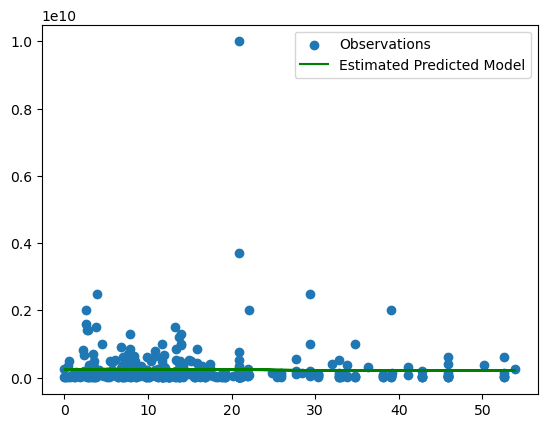

In [22]:
model = smf.ols(formula = 'Amount_Numeric ~ resources_rents ', data = merged_df)
results = model.fit()


b_list = results.params

# then compute the "estimated" best fit lines by extracting the intercept and slop from "b_list"

merged_df["p_estimated"] = b_list[0] + b_list[1]  * merged_df["resources_rents"]

#plot best fitted line

plt.scatter(x = merged_df["resources_rents"],y = merged_df["Amount_Numeric"])
plt.plot(merged_df["resources_rents"],merged_df["p_estimated"], color = 'green')

plt.legend(labels = ["Observations","Estimated Predicted Model"])
plt.show()



<font size = "4" color="red"> The plot results easily tell that projects directed to resource abundant countries are not systematically larger. </font>

<font size = "4">

Last, do resource-abundant countries tend to receive more money? 

In [24]:
# Aggregate project-level data to country-level by summing commitment amounts
country_level = project.groupby(['Country', 'Year']).agg({'Amount_Numeric': 'sum'}).reset_index()

# Sort the data by country and year
country_level = country_level.sort_values(by=['Country', 'Year']).reset_index(drop=True)

#merge two data


# Perform a left merge on 'country' and 'year'
merged_country = pd.merge(country_level, rent, on=['Country', 'Year'], how='left')


C:\Users\Zeyuan Wang\AppData\Local\Temp\ipykernel_27428\1095455023.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merged_country["p_estimated"] = b_list[0] + b_list[1]  * merged_country["resources_rents"]


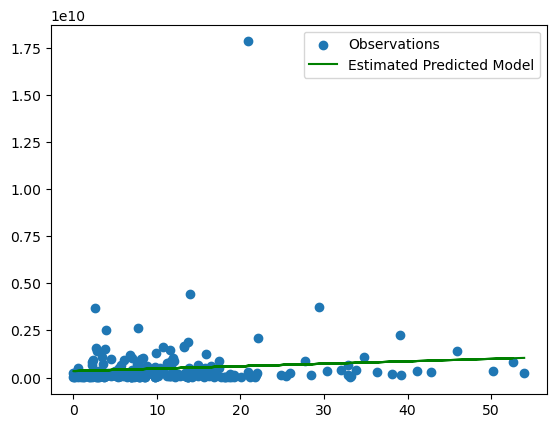

In [25]:
#fit linear model
model = smf.ols(formula = 'Amount_Numeric ~ resources_rents ', data = merged_country)
results = model.fit()


#obtain parameters

b_list = results.params

# then compute the "estimated" best fit lines by extracting the intercept and slop from "b_list"

merged_country["p_estimated"] = b_list[0] + b_list[1]  * merged_country["resources_rents"]

#plot best fitted line

plt.scatter(x = merged_country["resources_rents"],y = merged_country["Amount_Numeric"])
plt.plot(merged_country["resources_rents"],merged_country["p_estimated"], color = 'green')

plt.legend(labels = ["Observations","Estimated Predicted Model"])
plt.show()


In [26]:
from statsmodels.iolib.summary2 import summary_col

#produce summary table for regression results
results_univariate = smf.ols(formula = 'Amount_Numeric ~ resources_rents ', data = merged_country).fit(cov_type= "HC1")

#  add notation for significance by setting "stars" to True
print(summary_col(results_univariate,
                  stars = True))




                  Amount_Numeric 
---------------------------------
Intercept       340395683.2763***
                (66200698.1779)  
resources_rents 12990629.1956    
                (8037021.8137)   
R-squared       0.0100           
R-squared Adj.  0.0051           
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


<font size = "4" color="red"> The results suggest that total amount of loan is weakly coorelated with natural resources wealth in recipient countries.Yet, the correlation is not statistically significant. </font>